In [1]:
import pandas as pd
from datetime import datetime

In [54]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 
from matplotlib.pylab import rcParams

In [2]:
# Open the Season data
fantasy_df = pd.read_csv("../Data/testdata3.csv")  # data downloaded from ROTOGURU

# Display de DF
fantasy_df.head()

,Name,GID,Date,Team,Opp,Home,GTime(ET),Team_pts,Opp_pts,Win,...,STL,BLK,TOV,3P,FGM,FGA,FG%,FTM,FTA,FT%
0,Louis Williams,3816,2019-10-22,lac,lal,1,22.5,112,102,1,...,1,0,2,1,8,14,57.1%,4,4,100.0%
1,Quinn Cook,4863,2019-10-22,lal,lac,0,22.5,102,112,0,...,0,0,1,0,2,7,NaN,0,0,NaN
2,Nickeil Alexander-Walker,5887,2019-10-22,nor,tor,0,20.0,122,130,0,...,2,0,1,1,1,10,NaN,0,0,NaN
3,Jrue Holiday,4212,2019-10-22,nor,tor,0,20.0,122,130,0,...,0,2,5,1,6,15,40.0%,0,2,NaN
4,LeBron James,3541,2019-10-22,lal,lac,0,22.5,102,112,0,...,1,1,5,1,7,19,36.8%,3,4,100.0%


In [3]:
# MOve the DATE to the Index
fantasy_df.set_index('Date', inplace=True)
fantasy_df

,Name,GID,Team,Opp,Home,GTime(ET),Team_pts,Opp_pts,Win,Starter,...,STL,BLK,TOV,3P,FGM,FGA,FG%,FTM,FTA,FT%
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-22,Louis Williams,3816,lac,lal,1,22.5,112,102,1,0,...,1,0,2,1,8,14,57.1%,4,4,100.0%
2019-10-22,Quinn Cook,4863,lal,lac,0,22.5,102,112,0,0,...,0,0,1,0,2,7,NaN,0,0,NaN
2019-10-22,Nickeil Alexander-Walker,5887,nor,tor,0,20.0,122,130,0,0,...,2,0,1,1,1,10,NaN,0,0,NaN
2019-10-22,Jrue Holiday,4212,nor,tor,0,20.0,122,130,0,1,...,0,2,5,1,6,15,40.0%,0,2,NaN
2019-10-22,LeBron James,3541,lal,lac,0,22.5,102,112,0,1,...,1,1,5,1,7,19,36.8%,3,4,100.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02,Paul Watson,5958,tor,chi,1,15.0,129,102,1,0,...,0,0,0,0,0,0,0.0%,1,2,100.0%
2020-02-02,Monte Morris,5191,den,det,0,12.5,123,128,0,1,...,1,0,0,2,8,15,53.3%,1,1,100.0%
2020-02-02,Eric Bledsoe,4266,mil,pho,1,14.0,129,108,1,1,...,0,1,1,2,5,8,62.5%,0,1,NaN


In [4]:
fantasy_df.columns

Index(['Name', 'GID', 'Team', 'Opp', 'Home', 'GTime(ET)', 'Team_pts',
       'Opp_pts', 'Win', 'Starter', 'MIN', 'FDP', 'DD', 'TD', 'FD_Sal',
       'FD_pos', 'pos', 'ADI', 'VMI', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       '3P', 'FGM', 'FGA', 'FG%', 'FTM', 'FTA', 'FT%'],
      dtype='object')

# Data Integration

##Definining some repetitive functions to calculate some agregated stats by player and by team.

In [58]:
def aggr(group, date):
    test_df = pd.DataFrame()    
    test_df['LastFDP'] = group['FDP'][-1:]
    test_df['AvgFDP'] = group['FDP'].mean()
    test_df['AvgPTS'] = group['PTS'].mean()
    test_df['LastPT'] = group['PTS'][-1:]
    test_df['AvgMIN'] = group['MIN'].mean()
    test_df['LastMIN'] = group['MIN'][-1:]
    test_df['AvgFGM'] = group['FGM'].mean()
    test_df['LastFGM'] = group['FGM'][-1:]
    test_df['AvgFGA'] = group['FGA'].mean()
    test_df['LastFGA'] = group['FGA'][-1:]
    test_df['Avg3PTS'] = group['3P'].mean()
    test_df['Last3PTS'] = group['3P'][-1:]
    test_df['AvgREB'] = group['TRB'].mean()
    test_df['LastREB'] = group['TRB'][-1:]
    test_df['AvgAST'] = group['AST'].mean()
    test_df['LastAST'] = group['AST'][-1:]
    test_df['AvgSTL'] = group['STL'].mean()
    test_df['AvgTOV'] = group['TOV'].mean() 
    test_df['LastTOV'] = group['TOV'][-1:]
    #group['NumDouBL'] = group['DouBL'].sum()
    #group['NumTriBL'] = group['TriBL'].sum()
    test_df['Date'] = date

    test_df['Last3GameAvgFDP'] = group['FDP'][-3:].mean()
    test_df['Last3GameAvgMIN'] = group['MIN'][-3:].mean()
    test_df['Last3GameAvgPTS'] = group['PTS'][-3:].mean()
    
    num_team = len(group['Team'].unique())
    if(num_team==1):
        test_df['Name'] = group['Name'].unique()
        test_df['GID'] = group['GID'].unique()
        test_df['Team'] = group['Team'].unique()[0]
        test_df['position'] = group['pos'].unique()[0]
    else:
        test_df['Name'] = group['Name'].unique()
        test_df['GID'] = group['GID'].unique()
        test_df['Team'] = group['Team'].unique()[num_team-1]
        test_df['position'] = group['pos'].unique()       
    
    return(test_df)
    
def aggr_stats(date,dataframe):
    interest_columns = ['Name','GID','Team','pos','MIN','PTS','FGM','FGA', '3P', \
                        'TRB','AST','STL','TOV','DD','TD','FDP']
    
    date2 = date.strftime('%Y-%m-%d')
    tmp = fantasy_df.loc['2019-10-22':date2]
    
    GID_tmp = tmp.reset_index().copy()
    tmp.grouped = GID_tmp[interest_columns].groupby('GID')
    Newdf = pd.DataFrame()
    ids = GID_tmp['GID'].unique()
    
    for id in ids:
        group = tmp.grouped.get_group(id)
        df = aggr(group, date)
        df['Date'].append(date)
        Newdf = pd.concat([Newdf,df],axis=0)
    
    bins = [-10, 10, 20, 30, 40, 100]
    group_names = ['benchPlayer','belowAvg','average','advanced','top']
#     print(Newdf)
#     print(df)
    Newdf['Rank']= pd.cut(Newdf['AvgFDP'],bins,labels=group_names)
    
    return(Newdf)

In [70]:
# print(date)
# b = fantasy_df.loc['2019-10-22']  # debug only

# a = aggr_stats (datetime(2019, 10, 22), b) #debug only
# a

In [8]:
def aggr_teamVSteam(group):
        group['TeamStdVSFDP'] = group['FDP'].std()
        group['TeamAvgVSFDP'] = group['FDP'].mean()
        group['TeamMaxVSFDP'] = group['FDP'].max()
        return group

def aggr_team(group):
        group['TeamStdFDP'] = group['TeamStdVSFDP'].mean()
        group['TeamAvgFDP'] = group['TeamAvgVSFDP'].mean()
        group['TeamMaxFDP'] = group['TeamMaxVSFDP'].mean()
        return group    

def generate_team_features(playerGameLogs, playerFeatureTable, date):
    date2 = date.strftime('%Y-%m-%d')
    tmp = playerGameLogs['2019-10-22': date2]
    tmp = tmp.reset_index()
    bad_players = playerFeatureTable[playerFeatureTable.Rank=='benchPlayer']['GID']
    interest_cols = ['Name','GID','Team','Opp','pos','FDP','MIN']
    tmp = tmp[interest_cols]
    tmp = tmp[~tmp['GID'].isin(bad_players)]
    
    newdf = tmp.copy()
    newdf_grouped = newdf.groupby(['Team','Opp'])
        
    Newdf = newdf_grouped.apply(aggr_teamVSteam)
    Newdf.drop(['Name','GID','MIN','FDP','pos'],inplace=True,axis=1)
    Newdf.drop_duplicates(['Team','Opp'],inplace=True)
    
    Newdf.drop('Opp',axis=1,inplace=True)
    
    Newdf2 = Newdf.copy()
    Newdf2_grouped = Newdf2.groupby('Team')
    
    Newdf_overall = Newdf2_grouped.apply(aggr_team)
    Newdf_overall.drop(['TeamStdVSFDP','TeamAvgVSFDP','TeamMaxVSFDP'],inplace=True,axis=1)
    Newdf_overall.drop_duplicates('Team',inplace=True)
    
    return(Newdf_overall)

In [9]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)

In [10]:
train_date = '18/01/2020'
test_date = '02/02/2020'

In [71]:
train_date_index = pd.date_range(start='22/10/2019', end=train_date)
train_df = pd.DataFrame()
alldates = fantasy_df.index

nextdate = datetime(2019, 10, 22)

for date in train_date_index:
#     print(date) # debub only
#     print(nextdate) # debug only
    if date == nextdate:
        print(nextdate) # debug only
        #aggregate the statistics from players -> player-level features
        date2 = date.strftime('%Y-%m-%d')
        trainLogs = fantasy_df.loc['2019-10-22':date2]
        train_player_df = aggr_stats(date,trainLogs)
        
        nextdate = date + 1
        
        #next we need to collect the player's next game Fantasy Points.
        tmpLogs = fantasy_df[['Name', 'GID','Team','Opp','Home','FDP']].loc[nextdate.strftime('%Y-%m-%d')]
        tmpLogs.rename(columns={'FDP':'NewGameFDP'},inplace=True)

        #join the tmpLogs and player festure table by GID, which is based on the players on a new game day
        newgame_df = pd.merge(tmpLogs,train_player_df,how='inner',on='GID')
        drop_y(newgame_df)
        rename_x(newgame_df)

        #get the team features table 
        train_team_df = generate_team_features(fantasy_df, train_player_df, date)
        newgame_df = pd.merge(newgame_df,train_team_df,how='left',on='Team')
        train_df = pd.concat([train_df,newgame_df],axis=0)


2019-10-22 00:00:00


C:\Users\ddrag\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\ddrag\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`


2019-10-23 00:00:00


C:\Users\ddrag\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



2019-10-24 00:00:00
2019-10-25 00:00:00
2019-10-26 00:00:00
2019-10-27 00:00:00
2019-10-28 00:00:00
2019-10-29 00:00:00
2019-10-30 00:00:00
2019-10-31 00:00:00
2019-11-01 00:00:00
2019-11-02 00:00:00
2019-11-03 00:00:00
2019-11-04 00:00:00
2019-11-05 00:00:00
2019-11-06 00:00:00
2019-11-07 00:00:00
2019-11-08 00:00:00
2019-11-09 00:00:00
2019-11-10 00:00:00
2019-11-11 00:00:00
2019-11-12 00:00:00
2019-11-13 00:00:00
2019-11-14 00:00:00
2019-11-15 00:00:00
2019-11-16 00:00:00
2019-11-17 00:00:00
2019-11-18 00:00:00
2019-11-19 00:00:00
2019-11-20 00:00:00
2019-11-21 00:00:00
2019-11-22 00:00:00
2019-11-23 00:00:00
2019-11-24 00:00:00
2019-11-25 00:00:00
2019-11-26 00:00:00
2019-11-27 00:00:00
2019-11-28 00:00:00
2019-11-29 00:00:00
2019-11-30 00:00:00
2019-12-01 00:00:00
2019-12-02 00:00:00
2019-12-03 00:00:00
2019-12-04 00:00:00
2019-12-05 00:00:00
2019-12-06 00:00:00
2019-12-07 00:00:00
2019-12-08 00:00:00
2019-12-09 00:00:00
2019-12-10 00:00:00
2019-12-11 00:00:00
2019-12-12 00:00:00


In [72]:
test_date_index = pd.date_range(start=train_date, end=test_date, freq='D')[1:]
start_test_date = pd.date_range(start=train_date, end=test_date, freq='D')[0]
end_date = pd.date_range(start=test_date, end=test_date, freq='D')[0]
test_df = pd.DataFrame()

# print(test_date_index)
# print(start_test_date)
# print(end_date)
# print(test_df)
nextdate = datetime(2020,1,19)
# print(F"nextdate: {nextdate}") # debug only

for date in test_date_index:
#     tmp_idx = idx+1
#     if date == nextdate:
    print(date)
    if date == nextdate:
        print(nextdate) # debug only
        #aggregate the statistics from players -> player-level features
        date_E = date.strftime('%Y-%m-%d')
        testLogs = fantasy_df.loc[:date_E]
        test_player_df = aggr_stats(start_test_date,testLogs) 
        
        nextdate = date + 1
        
        if nextdate < datetime(2020,2,3):
            
            #next we need to collect the player's next game Fantasy Points.
            tmpLogs = fantasy_df[['Name', 'GID','Team','Opp','Home','FDP']].loc[nextdate.strftime('%Y-%m-%d')]
            tmpLogs.rename(columns={'FDP':'NewGameFDP'},inplace=True)
            #join the tmpLogs and player festure table by GID, which is based on the players on a new game day
            newgame_df = pd.merge(tmpLogs,train_player_df,how='inner',on='GID')
            drop_y(newgame_df)
            rename_x(newgame_df)

            #get the team features table 
            test_team_df = generate_team_features(fantasy_df, test_player_df, date)
            newgame_df = pd.merge(newgame_df,test_team_df,how='left',on='Team')
            test_df = pd.concat([test_df,newgame_df],axis=0)                
        
        
# print(train_df) # debug only
# print(test_df) # debug only

2020-01-19 00:00:00
2020-01-19 00:00:00


C:\Users\ddrag\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\ddrag\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`


2020-01-20 00:00:00
2020-01-20 00:00:00
2020-01-21 00:00:00
2020-01-21 00:00:00
2020-01-22 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-24 00:00:00
2020-01-25 00:00:00
2020-01-25 00:00:00
2020-01-26 00:00:00
2020-01-26 00:00:00
2020-01-27 00:00:00
2020-01-27 00:00:00
2020-01-28 00:00:00
2020-01-28 00:00:00
2020-01-29 00:00:00
2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-01-31 00:00:00
2020-02-01 00:00:00
2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-02 00:00:00


In [73]:
train_df.shape

(13064, 34)

In [74]:
test_df.shape

(2116, 34)

In [75]:
train_df.columns

Index(['Avg3PTS', 'AvgAST', 'AvgFDP', 'AvgFGA', 'AvgFGM', 'AvgMIN', 'AvgPTS',
       'AvgREB', 'AvgSTL', 'AvgTOV', 'Date', 'GID', 'Home', 'Last3GameAvgFDP',
       'Last3GameAvgMIN', 'Last3GameAvgPTS', 'Last3PTS', 'LastAST', 'LastFDP',
       'LastFGA', 'LastFGM', 'LastMIN', 'LastPT', 'LastREB', 'LastTOV', 'Name',
       'NewGameFDP', 'Opp', 'Rank', 'Team', 'TeamAvgFDP', 'TeamMaxFDP',
       'TeamStdFDP', 'position'],
      dtype='object')

In [76]:
test_df.columns

Index(['Name', 'GID', 'Team', 'Opp', 'Home', 'NewGameFDP', 'LastFDP', 'AvgFDP',
       'AvgPTS', 'LastPT', 'AvgMIN', 'LastMIN', 'AvgFGM', 'LastFGM', 'AvgFGA',
       'LastFGA', 'Avg3PTS', 'Last3PTS', 'AvgREB', 'LastREB', 'AvgAST',
       'LastAST', 'AvgSTL', 'AvgTOV', 'LastTOV', 'Date', 'Last3GameAvgFDP',
       'Last3GameAvgMIN', 'Last3GameAvgPTS', 'position', 'Rank', 'TeamStdFDP',
       'TeamAvgFDP', 'TeamMaxFDP'],
      dtype='object')

In [77]:
clist = ['Name', 'GID', 'Team', 'Opp', 'Home', 'NewGameFDP', 'LastFDP', 'AvgFDP',
       'AvgPTS', 'LastPT', 'AvgMIN', 'LastMIN', 'AvgFGM', 'LastFGM', 'AvgFGA',
       'LastFGA', 'Avg3PTS', 'Last3PTS', 'AvgREB', 'LastREB', 'AvgAST',
       'LastAST', 'AvgSTL', 'AvgTOV', 'LastTOV', 'Date', 'Last3GameAvgFDP',
       'Last3GameAvgMIN', 'Last3GameAvgPTS', 'position', 'Rank', 'TeamStdFDP',
       'TeamAvgFDP', 'TeamMaxFDP']
train_df = train_df[clist]
test_df = test_df[clist]

In [78]:
train_df.head(5).transpose()

,0,1,2,3,4
Name,Louis Williams,Tim Frazier,Patrick Patterson,Montrezl Harrell,Patrick Beverley
GID,3816,4717,4302,4857,4234
Team,lac,det,lac,lac,lac
Opp,gsw,atl,gsw,gsw,gsw
Home,0,1,0,0,0
NewGameFDP,40.6,8.5,24.1,23.7,27.3
LastFDP,38.5,0,7.6,34.4,24
AvgFDP,38.5,0,7.6,34.4,24
AvgPTS,21,0,4,17,2
LastPT,21,0,4,17,2


In [79]:
train_df = train_df[train_df.Rank!='benchPlayer']

In [80]:
test_df = test_df[test_df.Rank!='benchPlayer']

In [81]:
train_df.to_csv("../Data/Agg_train_set.csv")

In [82]:
test_df.to_csv("../Data/Agg_test_set.csv")

##Prepocessing

In [83]:
#Combine into data:
train_df['source']= 'train'
test_df['source'] = 'test'
data=pd.concat([train_df, test_df],ignore_index=True)
data.shape

(12651, 35)

####Note: thwe don't want to use benchplayers. So we don't have to train on those data, which might bias our prediction.

###Check Missing values

In [84]:
data.apply(lambda x: sum(x.isnull()))

Name               0
GID                0
Team               0
Opp                0
Home               0
NewGameFDP         0
LastFDP            0
AvgFDP             0
AvgPTS             0
LastPT             0
AvgMIN             0
LastMIN            0
AvgFGM             0
LastFGM            0
AvgFGA             0
LastFGA            0
Avg3PTS            0
Last3PTS           0
AvgREB             0
LastREB            0
AvgAST             0
LastAST            0
AvgSTL             0
AvgTOV             0
LastTOV            0
Date               0
Last3GameAvgFDP    0
Last3GameAvgMIN    0
Last3GameAvgPTS    0
position           0
Rank               0
TeamStdFDP         0
TeamAvgFDP         0
TeamMaxFDP         0
source             0
dtype: int64

###Look at categories of all object variables

In [85]:
var = ['Team','Opp', 'position','Rank']
for v in var:
    print (f"Frequency counts for {v}: ")
    print (data[v].value_counts())

Frequency counts for Team: 
mem    490
nor    474
mil    474
atl    472
dal    468
nyk    458
gsw    451
min    449
phi    445
pho    441
ind    440
cha    439
was    432
chi    429
lal    426
mia    424
sas    424
det    414
den    413
orl    411
tor    407
sac    400
okc    393
lac    388
uta    381
cle    381
bkn    378
por    369
bos    346
hou    334
Name: Team, dtype: int64
Frequency counts for Opp: 
den    447
chi    441
pho    439
gsw    439
okc    439
atl    432
cle    431
lal    430
tor    430
cha    425
nyk    424
sac    423
sas    422
phi    420
mem    420
por    418
lac    418
dal    418
hou    418
uta    417
det    416
bos    415
nor    414
ind    413
orl    412
mil    412
mia    408
bkn    405
was    404
min    401
Name: Opp, dtype: int64
Frequency counts for position: 
SG    2866
PG    2752
SF    2719
PF    2443
C     1871
Name: position, dtype: int64
Frequency counts for Rank: 
belowAvg       5631
average        4064
advanced       1973
top             983
benchPlayer 

###One-Hot Encoding

In [86]:
var_to_encode = ['Team','Opp','position','Rank']
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Name', 'GID', 'Home', 'NewGameFDP', 'LastFDP', 'AvgFDP', 'AvgPTS',
       'LastPT', 'AvgMIN', 'LastMIN',
       ...
       'position_C', 'position_PF', 'position_PG', 'position_SF',
       'position_SG', 'Rank_benchPlayer', 'Rank_belowAvg', 'Rank_average',
       'Rank_advanced', 'Rank_top'],
      dtype='object', length=101)

In [87]:
data.head(5).transpose()

,0,1,2,3,4
Name,Louis Williams,Montrezl Harrell,Patrick Beverley,Andre Drummond,Derrick Rose
GID,3816,4857,4234,4489,4073
Home,0,0,0,1,1
NewGameFDP,40.6,23.7,27.3,49.4,29.7
LastFDP,38.5,34.4,24,81.6,29.9
...,...,...,...,...,...
Rank_benchPlayer,0,0,0,0,0
Rank_belowAvg,0,0,0,0,0
Rank_average,0,0,1,0,1
Rank_advanced,1,1,0,0,0


###Separate train & test:

In [88]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [89]:
train.drop('source',axis=1,inplace=True)
test.drop('source',axis=1,inplace=True)

C:\Users\ddrag\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
train.to_csv('../Data/train_final.csv',index=False)
test.to_csv('../Data/test_final.csv',index=False)

In [91]:
target='NewGameFDP'
IDcol = 'GID'

In [92]:
predictors = [x for x in train.columns if x not in [target, IDcol, 'Name']]

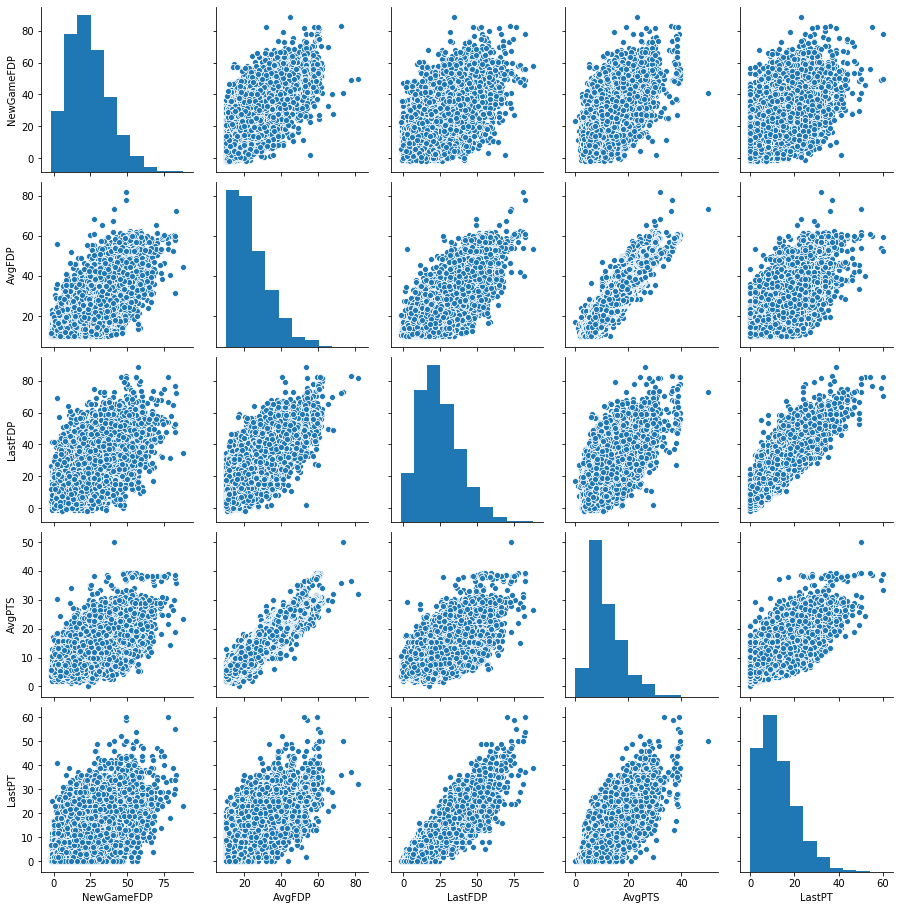

In [93]:
sns.pairplot(train[["NewGameFDP", "AvgFDP", "LastFDP","AvgPTS",'LastPT']])